In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys

import random
random.seed(10)
print(random.random()) 
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

sc.settings.set_figure_params(dpi=80)
%matplotlib inline 
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sc.set_figure_params(scanpy=True, fontsize=14 )
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']

0.5714025946899135
-----
anndata     0.8.0
scanpy      1.9.3
-----
PIL                         9.4.0
asttokens                   NA
backcall                    0.2.0
cffi                        1.15.1
cloudpickle                 3.0.0
colorama                    0.4.6
cycler                      0.10.0
cython_runtime              NA
cytoolz                     0.12.3
dask                        2023.5.0
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.3
h5py                        3.8.0
igraph                      0.10.1
ipykernel                   6.15.2
ipython_genutils            0.2.0
ipywidgets                  7.6.5
jedi                        0.18.1
jinja2                      3.0.3
joblib                      1.2.0
jupyter_server              1.18.1
kiwisolver                  1.4.4
leidenalg                   0.9.1
llvmlite     

In [2]:
def beautiful_cmap(initial_cmap="Reds", grey_intensity=0.2, color_intencity=0.1):
  
    from matplotlib import cm
    from matplotlib.colors import ListedColormap
    import numpy as np
    
    cm_color = cm.get_cmap(initial_cmap, 128)
    cm_grey = cm.get_cmap("Greys", 128)
    
    c = ListedColormap(
        np.vstack(
            (cm_grey(np.linspace(0.2, 0.2, 1)),
             cm_color(np.linspace(0.1, 1, 128)))
    ))
    
    return c

reds_cmap = beautiful_cmap()
blues_cmap = beautiful_cmap("Blues")
rb_cmap = beautiful_cmap("RdBu_r")


In [3]:
adata=sc.read_h5ad('/home/julia/data/placodes/h5ad/11_umap.h5ad')

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
adata

AnnData object with n_obs × n_vars = 55025 × 25865
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


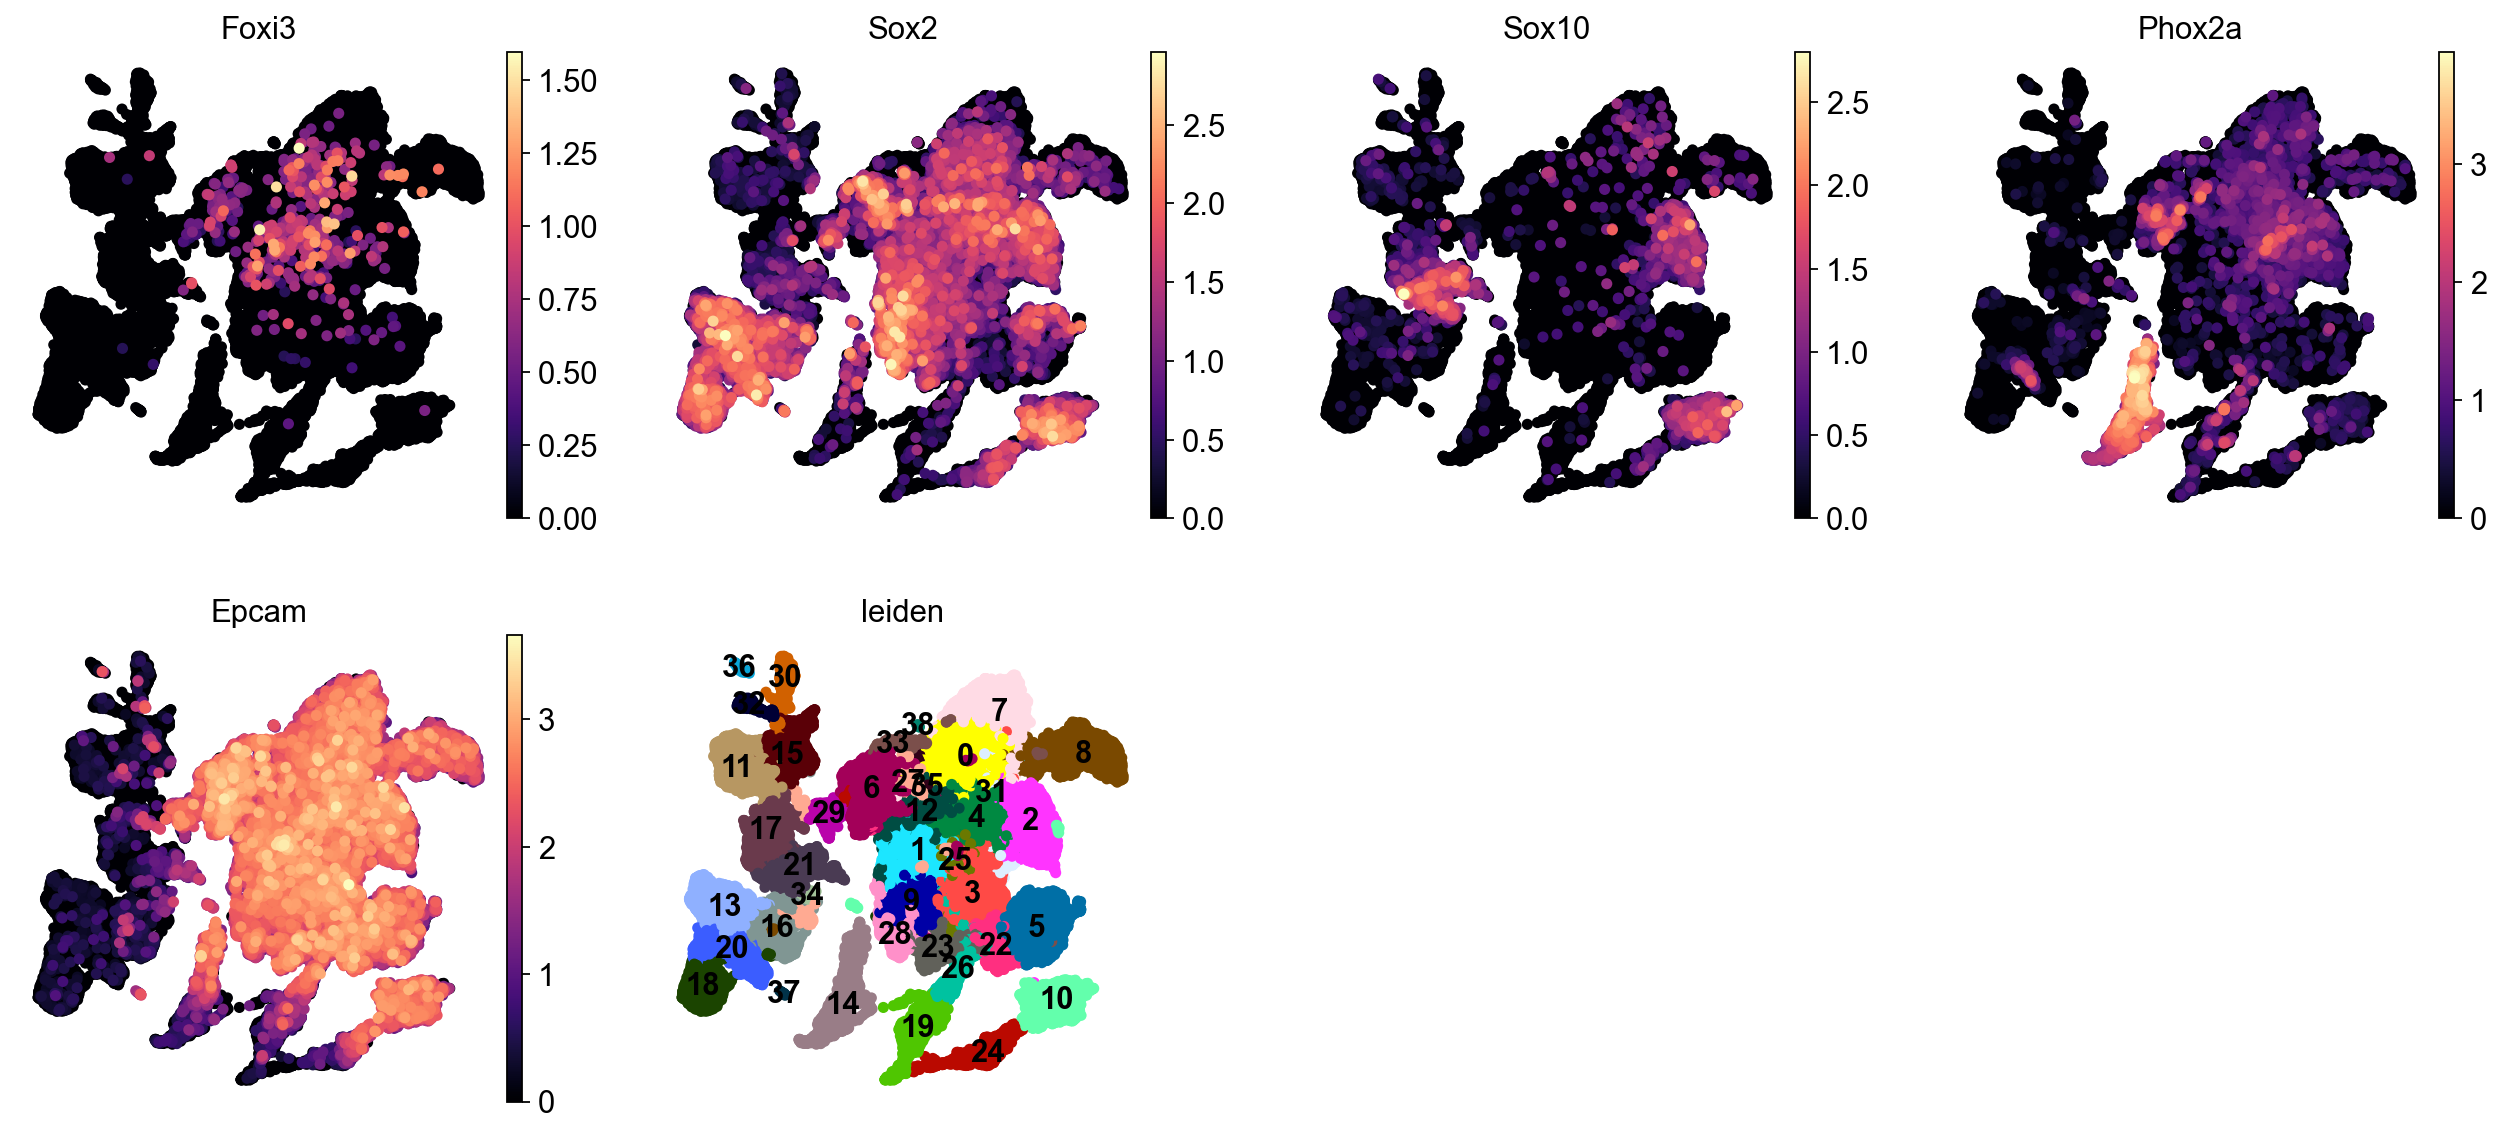

In [5]:
sc.pl.umap(adata, color=['Foxi3', 'Sox2', 'Sox10', 'Phox2a', 'Epcam', 'leiden'], size=100, frameon=False, legend_loc='on data', color_map='magma')

In [6]:
adata_epcam1=adata[~adata.obs['leiden'].isin(['36','32','11','18','17','21', '34','16','13','20','15', '37', '30'])]

In [7]:
adata_epcam1

View of AnnData object with n_obs × n_vars = 42795 × 25865
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'day_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [8]:
adata_epcam1.uns['log1p']["base"] = None 
sc.pp.highly_variable_genes(adata_epcam1)
adata_epcam1.raw = adata_epcam1
adata_epcam1 = adata_epcam1[:, adata_epcam1.var.highly_variable]
sc.pp.scale(adata_epcam1, max_value=10)

extracting highly variable genes
    finished (0:00:04)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:25)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:41)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:00)
running Leiden clustering
    finished: found 30 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:10)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


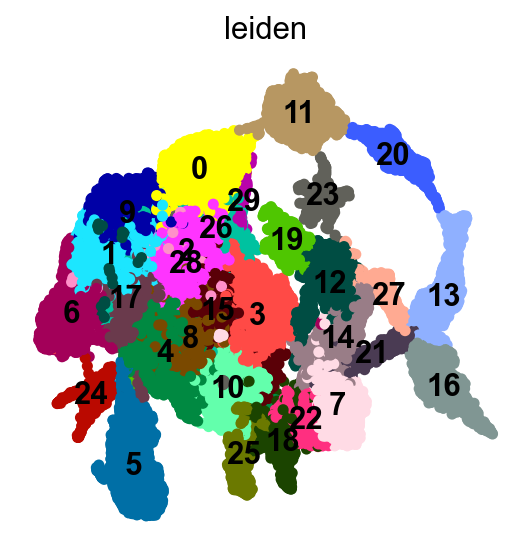

In [9]:
sc.tl.pca(adata_epcam1, n_comps=100)
sc.pp.neighbors(adata_epcam1, n_neighbors=30, n_pcs=40)
sc.tl.umap(adata_epcam1)
sc.tl.leiden(adata_epcam1)
sc.pl.umap(adata_epcam1, color=['leiden',], 
           size=100, frameon=False, legend_loc='on data', color_map='magma')
           

In [10]:
adata_epcam1.write('/home/julia/data/placodes/ANDYs_notebboks/h5ad/Epcam_umap_working_03_01_1.h5ad')

In [11]:
adata=sc.read_h5ad('/home/julia/data/placodes/ANDYs_notebboks/h5ad/Epcam_umap_working_03_01_1.h5ad')

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping

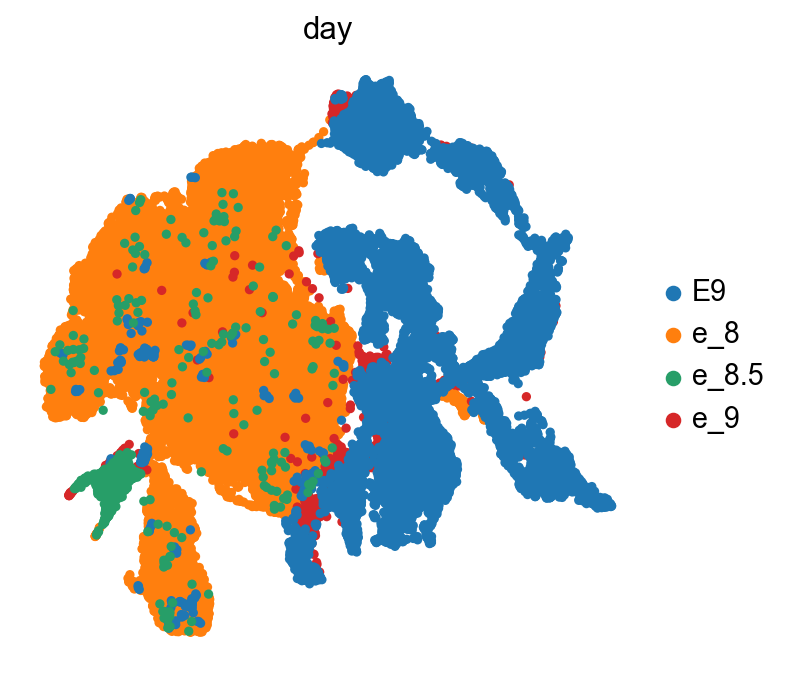

In [12]:
list(set(adata.obs.day))
ig, ax = plt.subplots(figsize=(5, 5))
 
s = 120000 / len(adata) * 4
sc.pl.umap(adata, color="day", frameon=False, ax=ax, show=False, s=s)
 
groups = [    'e_8',   'e_9','E9','e_8.5']
for group in groups:
     sc.pl.umap(adata[adata.obs.day == group], color="day", frameon=False, ax=ax, show=False,legend_loc=None, size=70)

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping

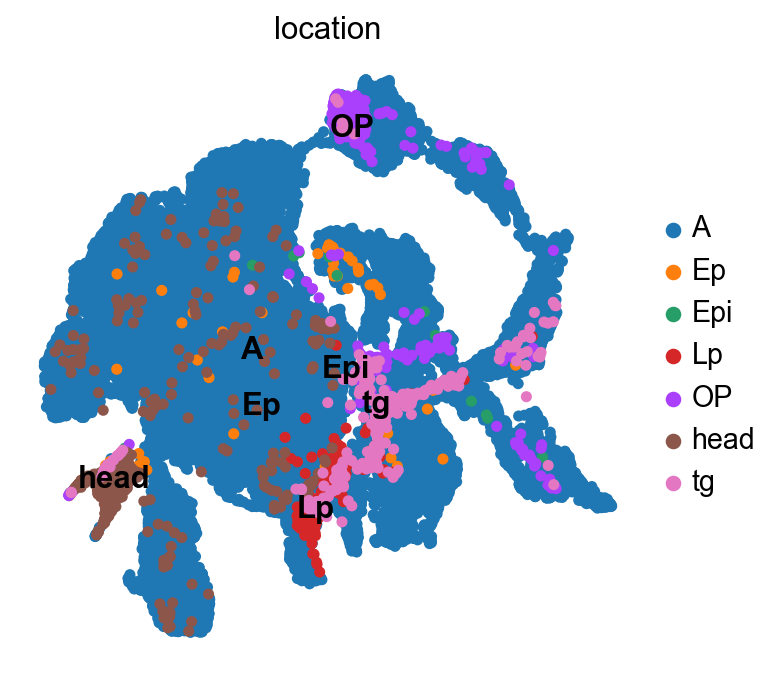

In [13]:
list(set(adata.obs.location))
ig, ax = plt.subplots(figsize=(5, 5))
 
s = 120000 / len(adata) * 4
sc.pl.umap(adata, color="location", frameon=False, ax=ax, show=False, s=s, size=200)
 
groups = [  'A', 'Ep', 'Epi','Lp', 'OP',  'head',  'tg']
for group in groups:
     sc.pl.umap(adata[adata.obs.location == group], color="location", frameon=False, ax=ax, show=False,legend_loc='on data', size=100)

In [14]:
adata.obs_names_make_unique()

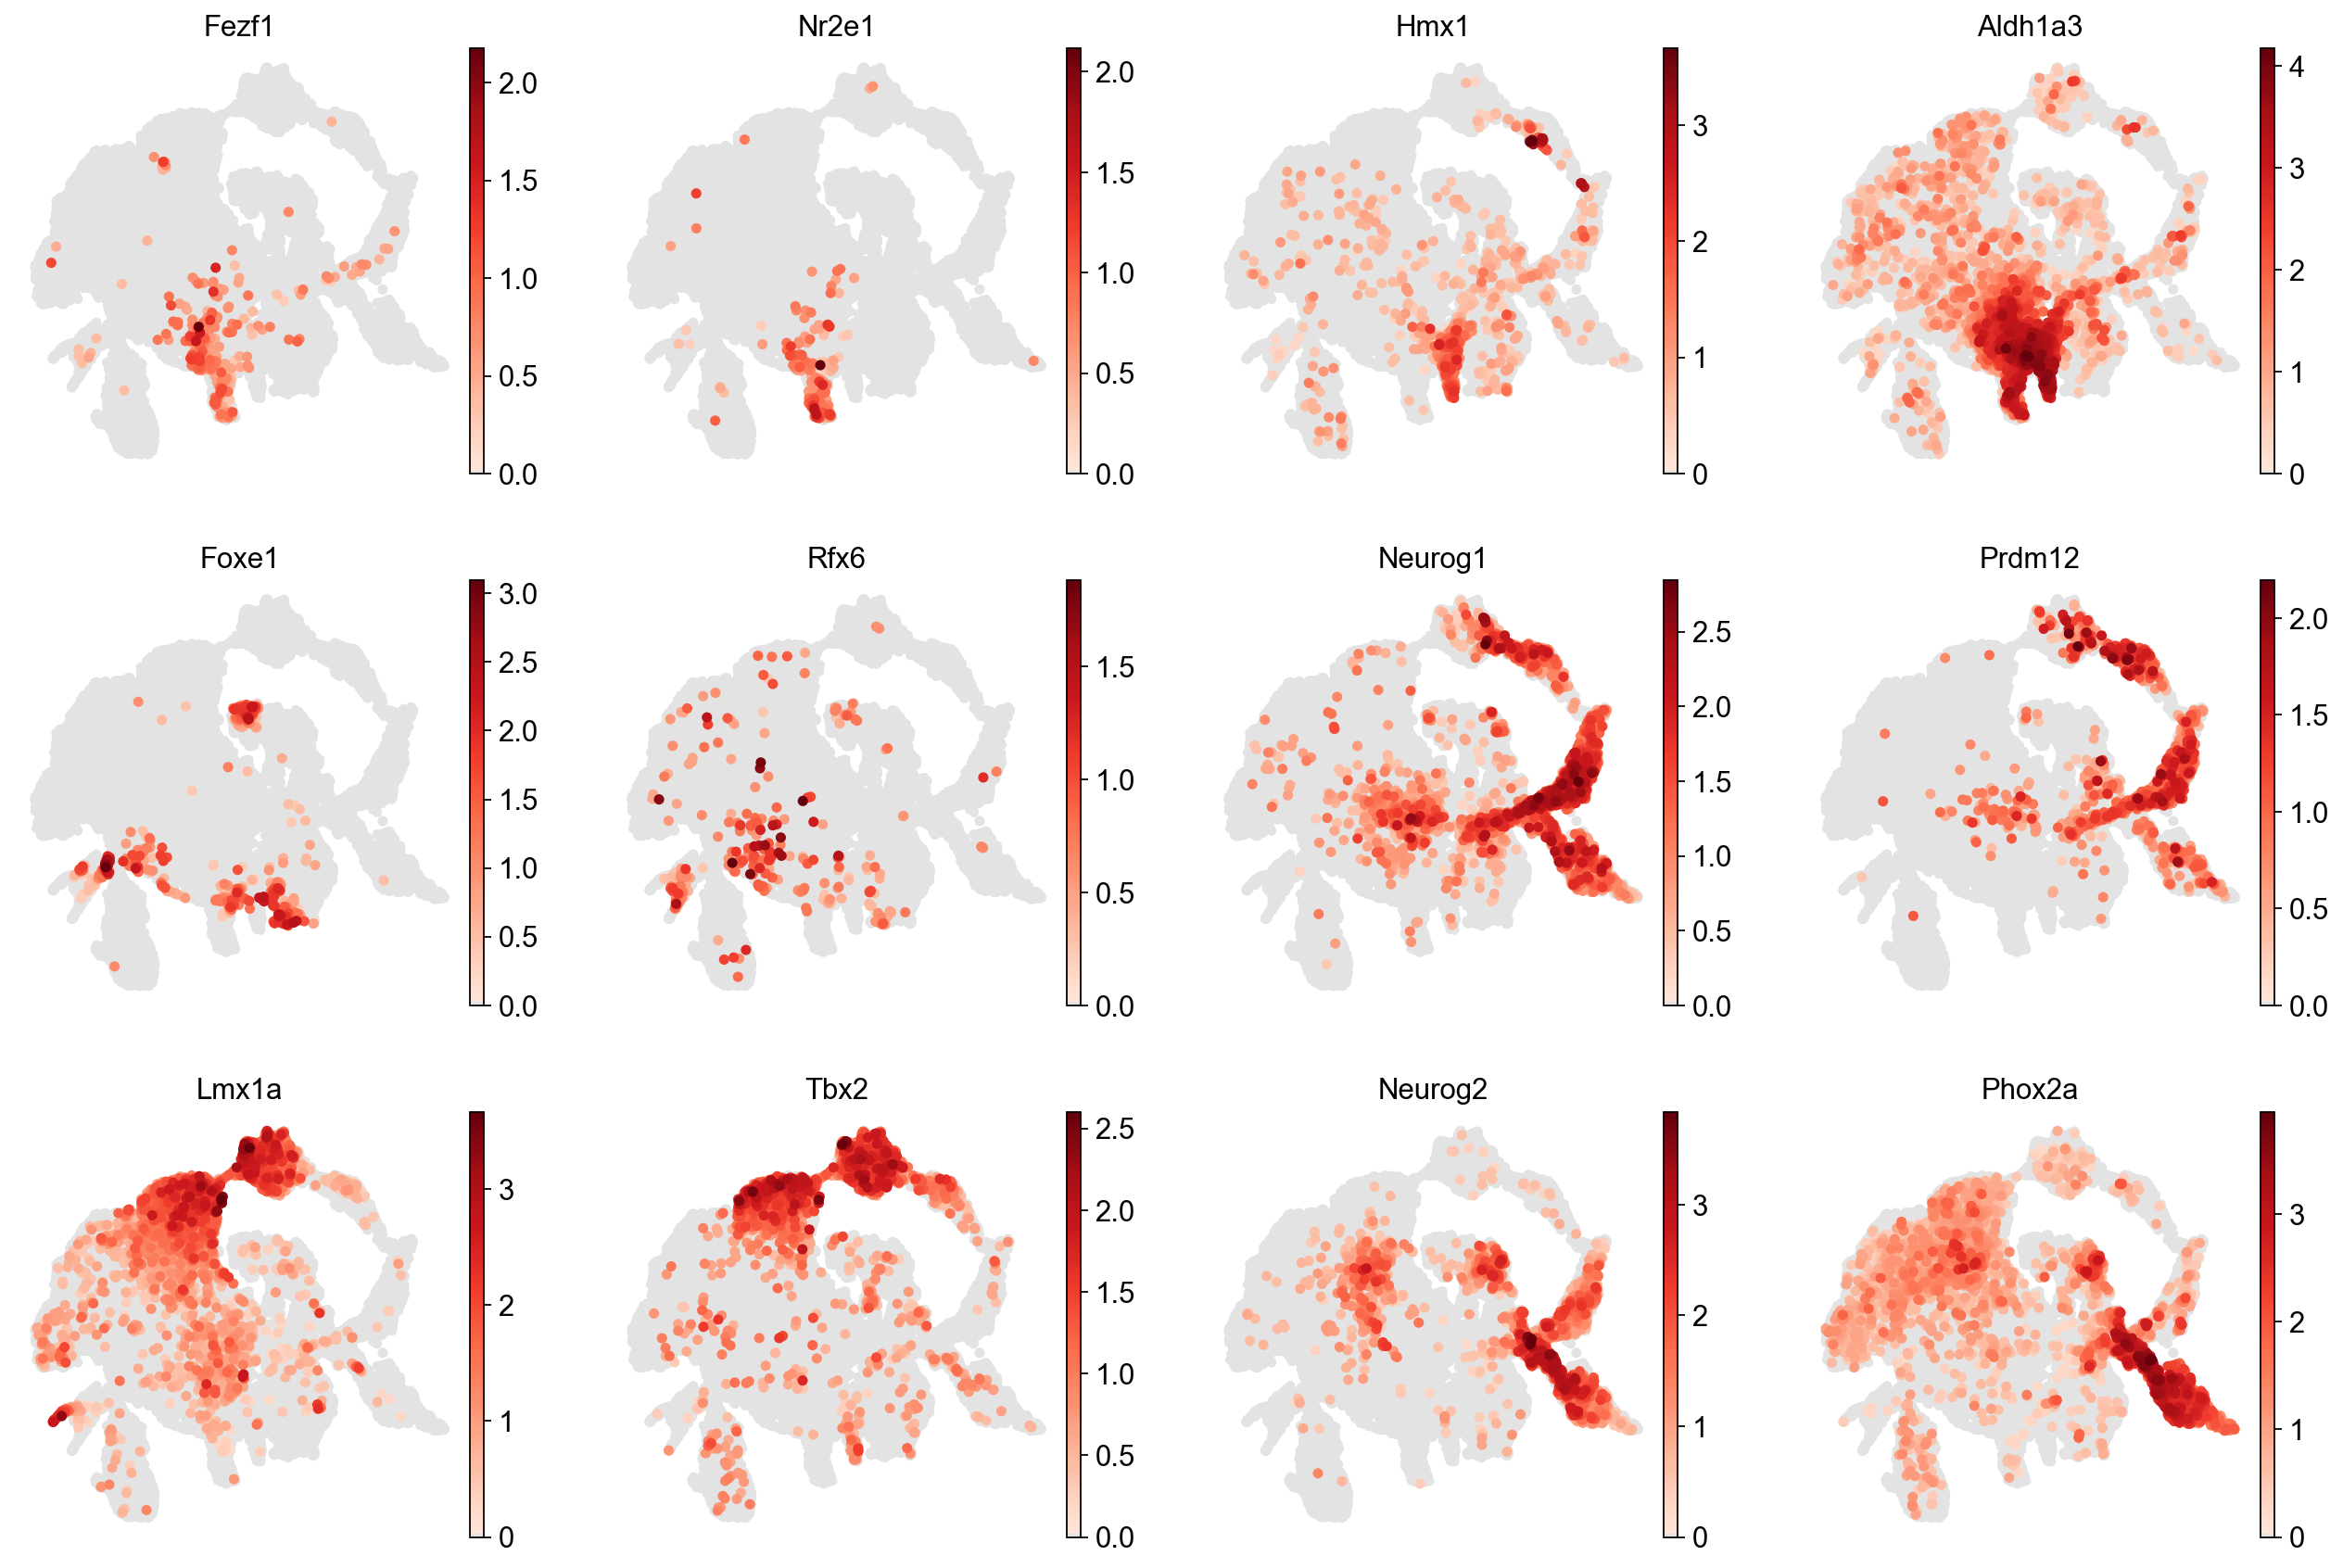

In [15]:
sc.pl.umap(adata, color=['Fezf1',  'Nr2e1','Hmx1','Aldh1a3', 'Foxe1' ,'Rfx6', 'Neurog1',   'Prdm12', 'Lmx1a', 'Tbx2', 'Neurog2', 'Phox2a'], 
           size=100, frameon=False, legend_loc='on data', color_map = reds_cmap,)